<a href="https://www.kaggle.com/code/timllll/heart-disease-eda?scriptVersionId=102106540" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [2]:
df = pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Variables

1. HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI: Body Mass Index (BMI).
3. Smoking: Have you smoked at least 100 cigarettes in your entire life?
4. AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke: (Ever told) (you had) a stroke?
6. PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking: Do you have serious difficulty walking or climbing stairs?
9. Sex: Are you male or female?
10. AgeCategory: Fourteen-level age category. (then calculated the mean)
11. Race: Imputed race/ethnicity value.
12. Diabetic: (Ever told) (you had) diabetes?
13. PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth: Would you say that in general your health is...
15. SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma: (Ever told) (you had) asthma?
17. KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer: (Ever told) (you had) skin cancer?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Distribution of the target variable (HeartDisease)

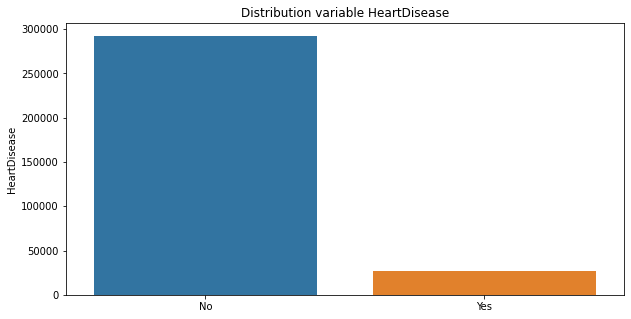

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=df['HeartDisease'].value_counts().index, y=df['HeartDisease'].value_counts())
plt.title('Distribution variable HeartDisease')
plt.show()

In [5]:
df.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [6]:
bin_cat = list(df.nunique()[df.nunique() == 2].index)
bin_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [7]:

colors = sns.color_palette('colorblind')
def HeartDisease_and_bin(column):

    figure, ax = plt.subplots(1,3,figsize=(16,5))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), ax=ax[0])
    ax[0].set_title(f'{column} distribution')
    ax[1].pie(df[df['HeartDisease'] == "No"][column].value_counts(), labels=df[df['HeartDisease'] == "No"][column].value_counts().index, colors=colors)
    ax[1].set_title('No Heart Disease')
    ax[2].pie(df[df['HeartDisease'] == "Yes"][column].value_counts(), labels=df[df['HeartDisease'] == "Yes"][column].value_counts().index, colors=colors)
    ax[2].set_title('Yes Heart Disease')

    plt.show()
    
    

## Categorical  variables


#### Target variable and "Sex"

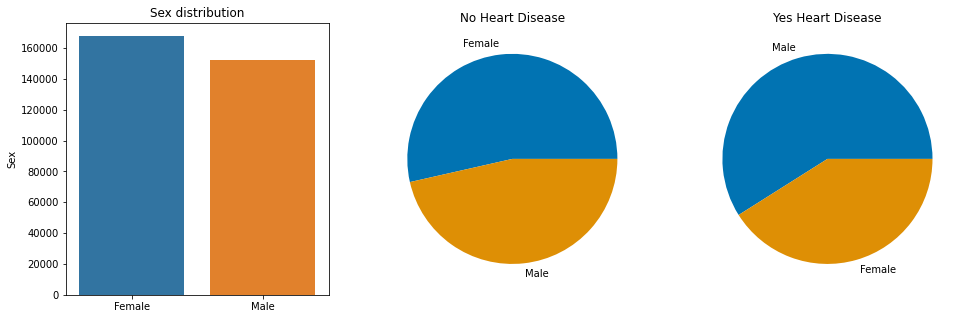

In [8]:
HeartDisease_and_bin('Sex')

#### Target variable and "Smoking"

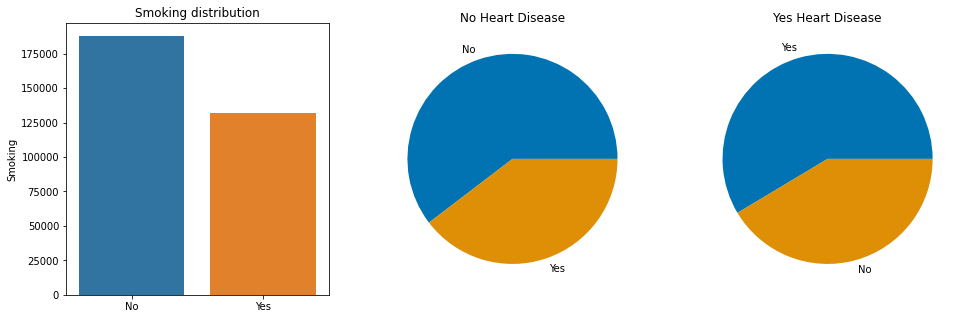

In [9]:
HeartDisease_and_bin('Smoking')

#### Target variable and AlcoholDrinking

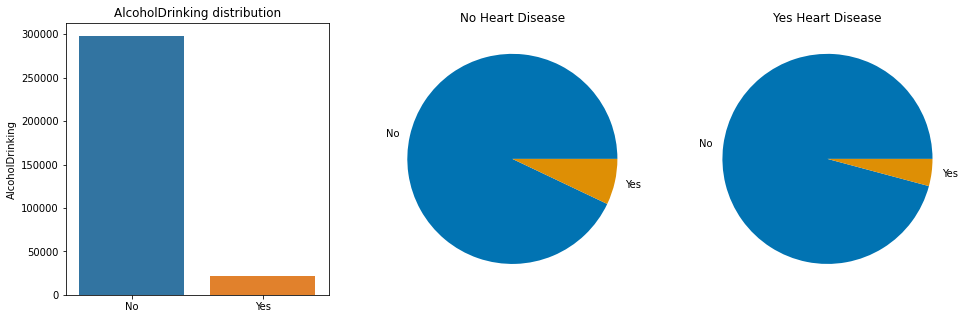

In [10]:
HeartDisease_and_bin('AlcoholDrinking')

#### Target variable and Stroke

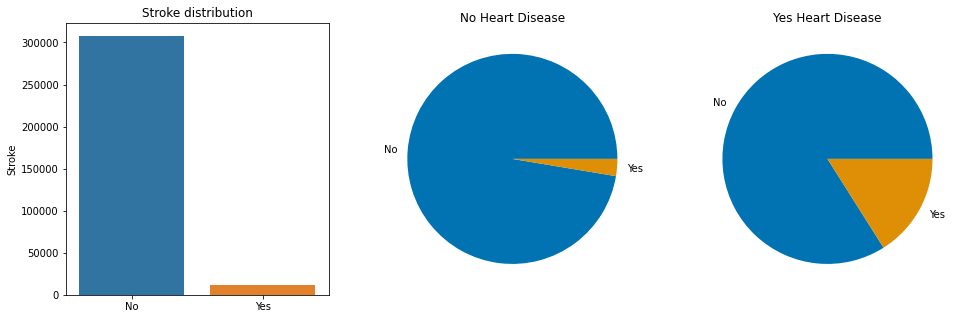

In [11]:
HeartDisease_and_bin('Stroke')

#### Target variable and DiffWalking

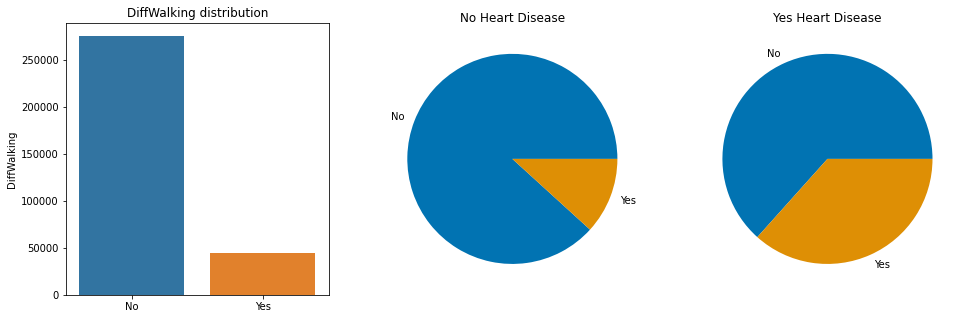

In [12]:
HeartDisease_and_bin('DiffWalking')

#### Target variable and Asthma

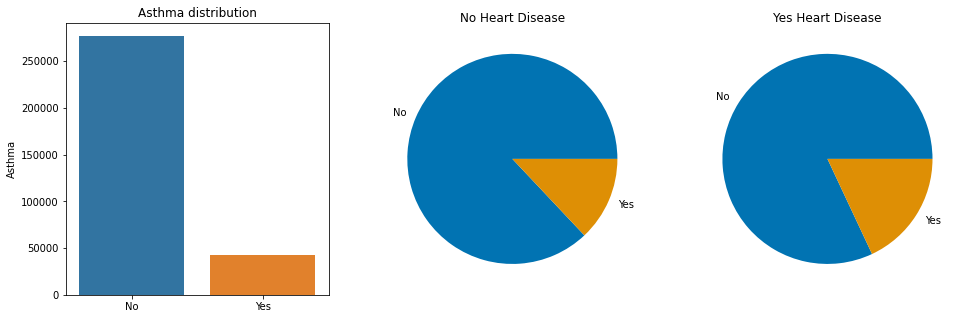

In [13]:
HeartDisease_and_bin('Asthma')

#### Target variable and KidneyDisease

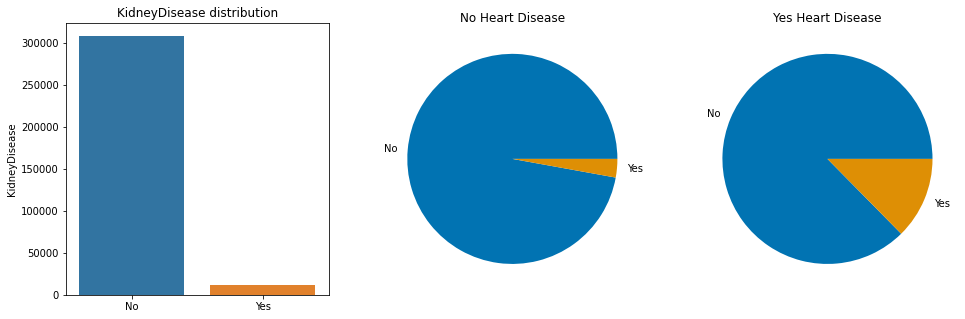

In [14]:
HeartDisease_and_bin('KidneyDisease')

#### Target variable and SkinCancer

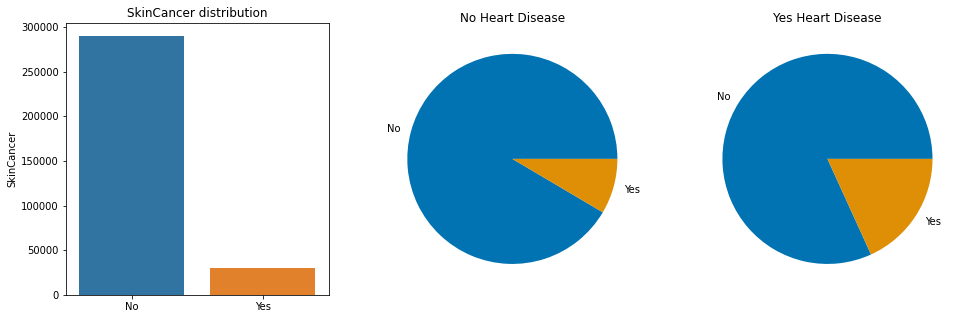

In [15]:
HeartDisease_and_bin('SkinCancer')

In [16]:
cat1 = df.nunique()[(df.nunique() > 2) & (df.nunique() < 14)].index
def HeartDisease_and_catig(col):
    fig, ax = plt.subplots(3,1,figsize=(10,15))

    colors = sns.color_palette('colorblind')

    df[col].value_counts().plot(kind='pie',colors=colors, ax=ax[0])
    ax[0].set_title(f" {col} distribution", fontsize=18)
    ax[0].set_ylabel('')

    sns.countplot(data=df.sort_values(col), x=col, hue='HeartDisease', ax=ax[1])
    ax[1].set_title(f"Distribution of HeartDisease by {col}", fontsize=18)
    ax[1].set_xlabel('')
    
    t = pd.DataFrame((df[df['HeartDisease']== 'Yes'][col].value_counts() / df[col].value_counts() * 100)).sort_values(col)
    sns.barplot(y=t[col], x=t[col].index, ax=ax[2])
    ax[2].set_title(f"Percentage of people with heart disease according to {col}", fontsize=18)
    ax[2].set_ylabel('Percentage')

    plt.show()

#### AgeCategory

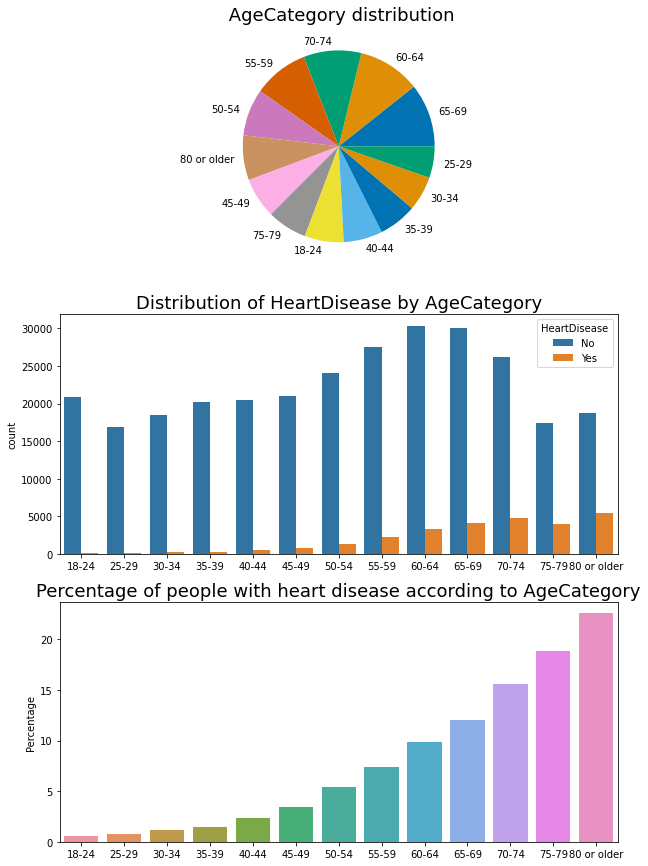

In [17]:
HeartDisease_and_catig('AgeCategory')

#### Race

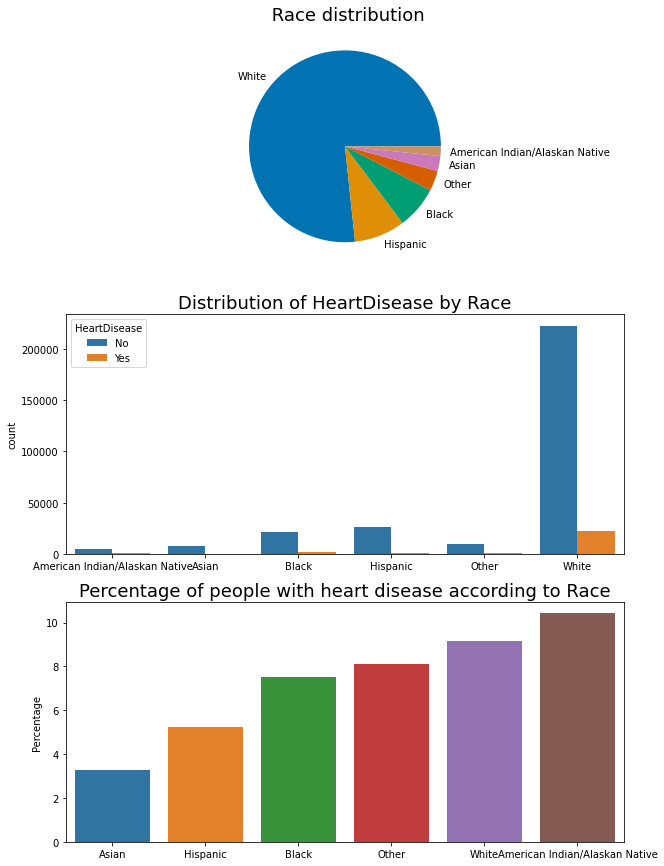

In [18]:
HeartDisease_and_catig('Race')

#### Diabetic

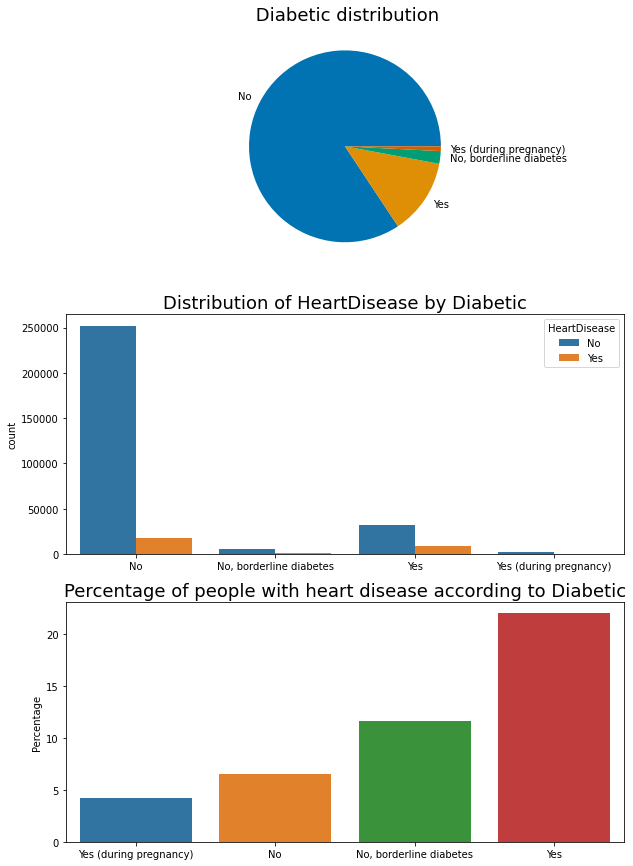

In [19]:
HeartDisease_and_catig('Diabetic')

#### GenHealth

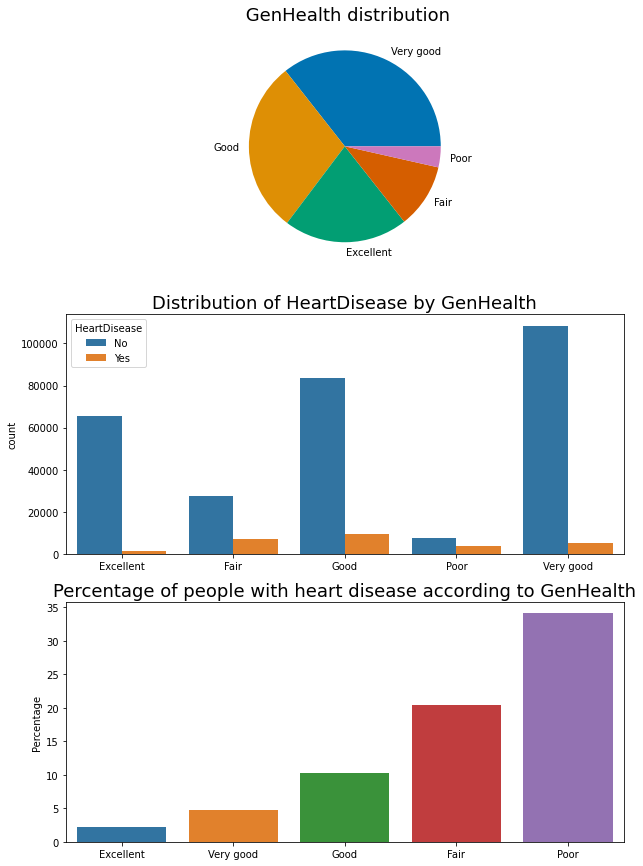

In [20]:
HeartDisease_and_catig('GenHealth')

In [21]:
df[df['HeartDisease'] == "Yes"]['GenHealth'].value_counts()

Good         9558
Fair         7084
Very good    5381
Poor         3850
Excellent    1500
Name: GenHealth, dtype: int64

In [22]:
df[df['HeartDisease'] == "No"]['GenHealth'].value_counts()

Very good    108477
Good          83571
Excellent     65342
Fair          27593
Poor           7439
Name: GenHealth, dtype: int64

## Numerical variables

In [23]:
num_f = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [24]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


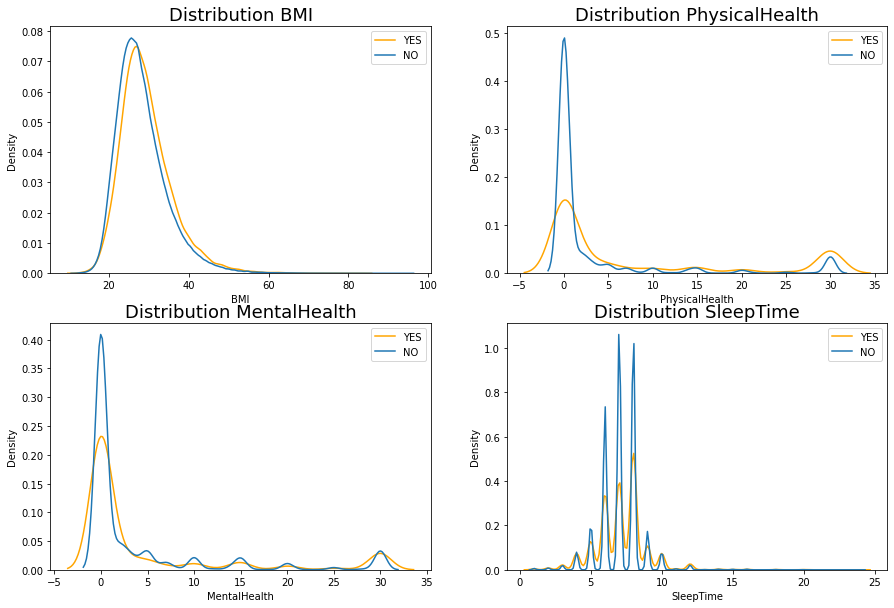

In [25]:
plt.figure(figsize=(15,10))
for i, num in enumerate(num_f):
    plt.subplot(2,2, i+1)
    sns.kdeplot(df[df["HeartDisease"] == 'Yes'][num], label = 'YES', color='orange')
    sns.kdeplot(df[df['HeartDisease'] == 'No'][num], label = 'NO')
    plt.legend()
    plt.title(f'Distribution {num}', fontsize=18)


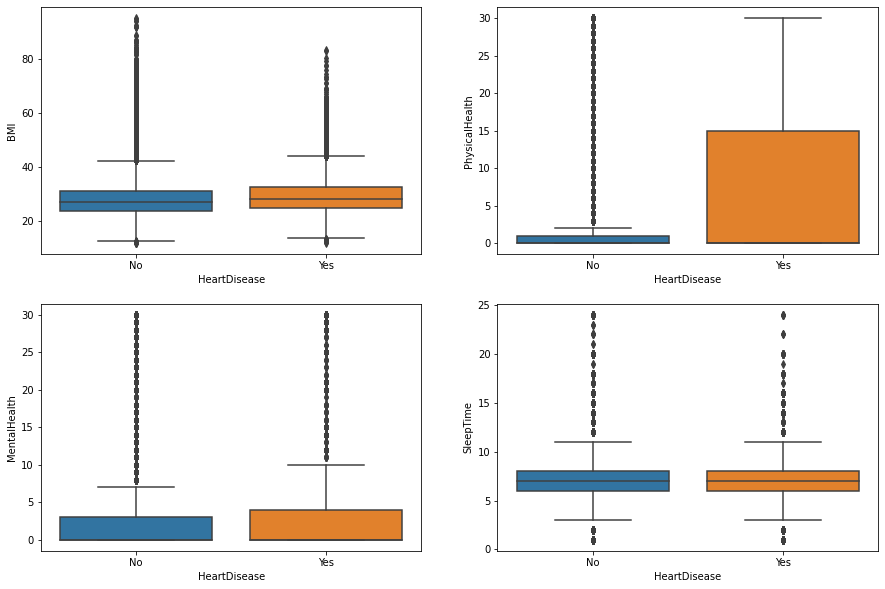

In [26]:
plt.figure(figsize=(15,10))
for i, num in enumerate(num_f):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df[num], x=df['HeartDisease'])


### Outliers

In [27]:
df['SleepTime'].value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [28]:
df = df[(df['SleepTime'] < 21)]
df['SleepTime'].value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
17.0       21
19.0        3
Name: SleepTime, dtype: int64

In [29]:
q3 = df['BMI'].quantile(0.75)
q1 = df['BMI'].quantile(0.25)
iqr = q3 - q1

iqr_outlier_threshold_bottom = q1 - 3*iqr
iqr_outlier_threshold_up = q3 + 3*iqr
print('bottom:', iqr_outlier_threshold_bottom, 'up:', iqr_outlier_threshold_up)


print(df[df['BMI'] > iqr_outlier_threshold_up].shape, 'up')
print(df[df['BMI'] < iqr_outlier_threshold_bottom].shape, 'bottom')
df = df[(df['BMI'] <= iqr_outlier_threshold_up) & (df['BMI'] >= iqr_outlier_threshold_bottom)]
print(df.shape)

bottom: 1.8599999999999994 up: 53.59
(1316, 18) up
(0, 18) bottom
(318435, 18)


### Categorical Feature Encoding


In [30]:
bin_cat.remove('Sex')
bin_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [31]:
for i in bin_cat:
    df[i] = df[i].map({'Yes':1, 'No':0})

In [32]:
df['Sex'] = df['Sex'].map({'Female':1, 'Male':0})

In [33]:
age = {}
for i in df['AgeCategory'].unique():
    x = int(i[:2])
    age[i] = x
age   

{'55-59': 55,
 '80 or older': 80,
 '65-69': 65,
 '75-79': 75,
 '40-44': 40,
 '70-74': 70,
 '60-64': 60,
 '50-54': 50,
 '45-49': 45,
 '18-24': 18,
 '35-39': 35,
 '30-34': 30,
 '25-29': 25}

In [34]:
df['AgeCategory'] = df['AgeCategory'].map(age)


In [35]:
df = pd.get_dummies(df)

In [36]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,55,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,40,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,1,45,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25,...,0,1,0,0,0,0,0,1,0,0


### Pearson Correlation

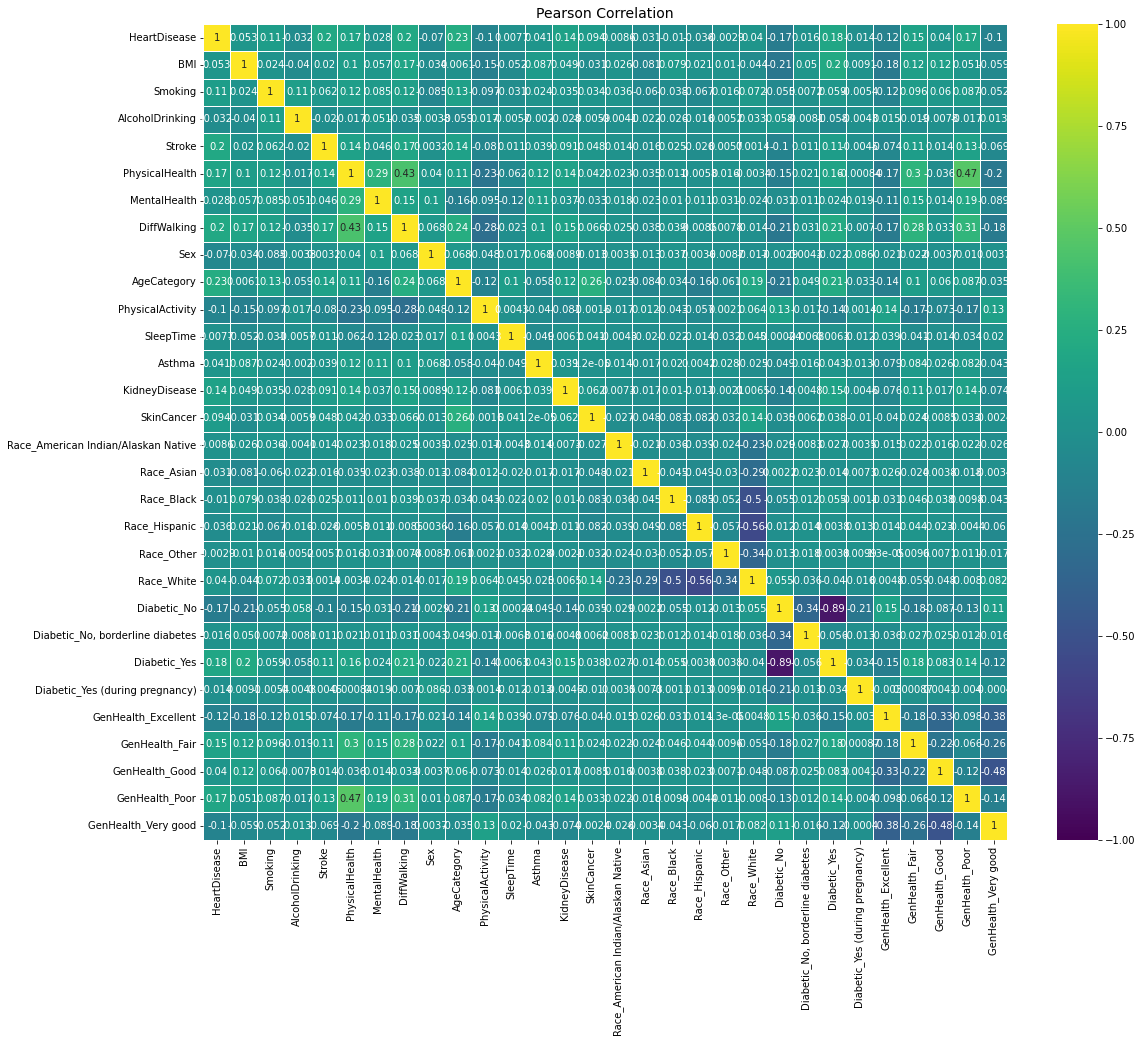

In [37]:
correlation = df.corr()

corr = plt.figure(figsize= (18, 15))
corr = sns.heatmap(correlation, vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white")
corr.set_title("Pearson Correlation",fontsize= 14)

plt.show()

In [38]:
df = df.drop('Diabetic_No', axis=1)

In [39]:
y = df['HeartDisease']
df = df.drop('HeartDisease', axis=1)


## Conclusions

- Heart disease surveillance is more common in men than in women.
- Smoking contributes to heart disease.
- Drinking alcohol does not affect (slightly reduces) the likelihood of having heart disease, this is unusual and may be due to a "third" variable.
- Stroke increases the risk of heart disease.
- Difficulty walking or climbing stairs is more common in people with heart disease.
- Asthma slightly increases the chance of having heart disease
- Kidney disease and skin cancer increase the chance of having heart disease.
- The risk of heart disease increases with age.
- Slightly more likely to have heart disease in American Indians/Alaska Natives.
- Diabetes  contributes to heart disease.
- Poor general health markedly increases the likelihood of heart disease, but people with heart disease may report general health as good
- With an increase in BMI (30+), the likelihood of heart disease increases.
- The number of days in physical health was poor increases the likelihood of having heart disease.
- Mental health status and sleep time only slightly affect the likelihood of having heart disease.

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)


In [42]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [43]:
def result(test, pred, model):
    print(f'model: {str(model)}')
    print(f'Accuracy_score: {accuracy_score(test, pred)}')
    print(f'Precission_score: {precision_score(test, pred)}')
    print(f'Recall_score: {recall_score(test, pred)}')
    print(f'F1-score: {f1_score(test, pred)}')
dct = {}

#### Decision Tree

In [44]:
first_tree = DecisionTreeClassifier(random_state=17)
first_tree.fit(X_train, y_train)
first_tree_y_predict = first_tree.predict(X_test)
result(y_test, first_tree_y_predict, first_tree)
dct['Decision Tree'] = (f1_score(y_test, first_tree_y_predict))

model: DecisionTreeClassifier(random_state=17)
Accuracy_score: 0.8639224208318155
Precission_score: 0.23049885088549413
Recall_score: 0.2490505404615834
F1-score: 0.23941585340167099


#### Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_predict = logreg.predict(X_test)
result(y_test, logreg_y_predict, logreg)
dct['LogisticRegression'] = (f1_score(y_test, logreg_y_predict))

model: LogisticRegression()
Accuracy_score: 0.9154995038249444
Precission_score: 0.5445026178010471
Recall_score: 0.10633946830265849
F1-score: 0.17792985457656116


#### KNN

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)
result(y_test, knn_y_predict, knn)
dct['KNN'] = (f1_score(y_test, knn_y_predict))

model: KNeighborsClassifier()
Accuracy_score: 0.9062794407667475
Precission_score: 0.37802459341531136
Recall_score: 0.13920537540169442
F1-score: 0.20348030319205723


#### Random forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
random_forest_predict = random_forest.predict(X_test)
result(y_test, random_forest_predict, random_forest)
dct['Random forest'] = (f1_score(y_test, random_forest_predict))

model: RandomForestClassifier(n_estimators=200)
Accuracy_score: 0.9061287040410004
Precission_score: 0.35769405356332273
Recall_score: 0.11510371019573473
F1-score: 0.17416289092717427


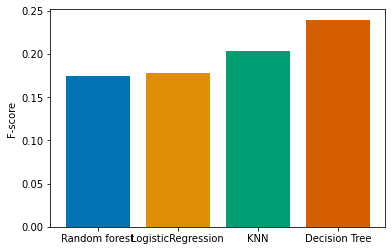

In [48]:
dct = dict(sorted(dct.items(), key=lambda x: x[1]))
ind = np.arange(len(dct))
plt.bar(ind, list(dct.values()), color=colors)
plt.xticks(ind, list(dct.keys()))
plt.ylabel('F-score')
plt.show()


In [49]:
dct = {}

### Oversampling

In [50]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 218450, 1: 218450})


#### Decision Tree

In [51]:
first_tree = DecisionTreeClassifier(random_state=42)
first_tree.fit(X_res, y_res)
first_tree_y_predict = first_tree.predict(X_test)
result(y_test, first_tree_y_predict, first_tree)
dct['Decision Tree'] = (f1_score(y_test, first_tree_y_predict))

model: DecisionTreeClassifier(random_state=42)
Accuracy_score: 0.8641234031328117
Precission_score: 0.2134507143888007
Recall_score: 0.21603856266432953
F1-score: 0.21473684210526314


#### Logistic Regression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
logreg_y_predict = logreg.predict(X_test)
result(y_test, logreg_y_predict, logreg)
dct['LogisticRegression'] = (f1_score(y_test, logreg_y_predict))

model: LogisticRegression()
Accuracy_score: 0.7510708588224949
Precission_score: 0.2255279529391849
Recall_score: 0.7784107508033888
F1-score: 0.34972928630024613


#### KNN

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_res, y_res)
knn_y_predict = knn.predict(X_test)
result(y_test, knn_y_predict, knn)
dct['KNN'] = (f1_score(y_test, knn_y_predict))

model: KNeighborsClassifier()
Accuracy_score: 0.7986408571895137
Precission_score: 0.21206420867820416
Recall_score: 0.4940111013730646
F1-score: 0.2967447573922962


#### Random forest

In [54]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_res, y_res)
random_forest_predict = random_forest.predict(X_test)
result(y_test, random_forest_predict, random_forest)
dct['Random forest'] = (f1_score(y_test, random_forest_predict))

model: RandomForestClassifier(n_estimators=200)
Accuracy_score: 0.8914946802497206
Precission_score: 0.3114478114478115
Recall_score: 0.21618463336254748
F1-score: 0.25521641662355576


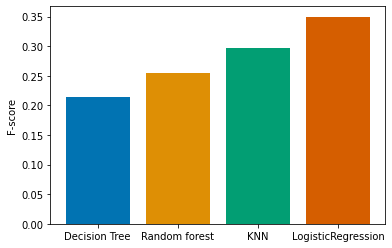

In [55]:
dct = dict(sorted(dct.items(), key=lambda x: x[1]))
ind = np.arange(len(dct))
plt.bar(ind, list(dct.values()), color=colors)
plt.xticks(ind, list(dct.keys()))
plt.ylabel('F-score')
plt.show()
